**IMPORTS**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from numpy import concatenate
from pandas import DataFrame, concat
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, roc_curve, precision_recall_curve, confusion_matrix, mean_absolute_error
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split, cross_val_score



**PREPROCESSING**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      43824 non-null  int64  
 1   year    43823 non-null  float64
 2   month   43823 non-null  float64
 3   day     43822 non-null  float64
 4   hour    43821 non-null  float64
 5   pm2.5   41757 non-null  float64
 6   DEWP    43821 non-null  float64
 7   TEMP    43817 non-null  float64
 8   PRES    43819 non-null  float64
 9   cbwd    43824 non-null  object 
 10  Iws     43824 non-null  float64
 11  Is      43824 non-null  int64  
 12  Ir      43824 non-null  int64  
dtypes: float64(9), int64(3), object(1)
memory usage: 4.3+ MB
None


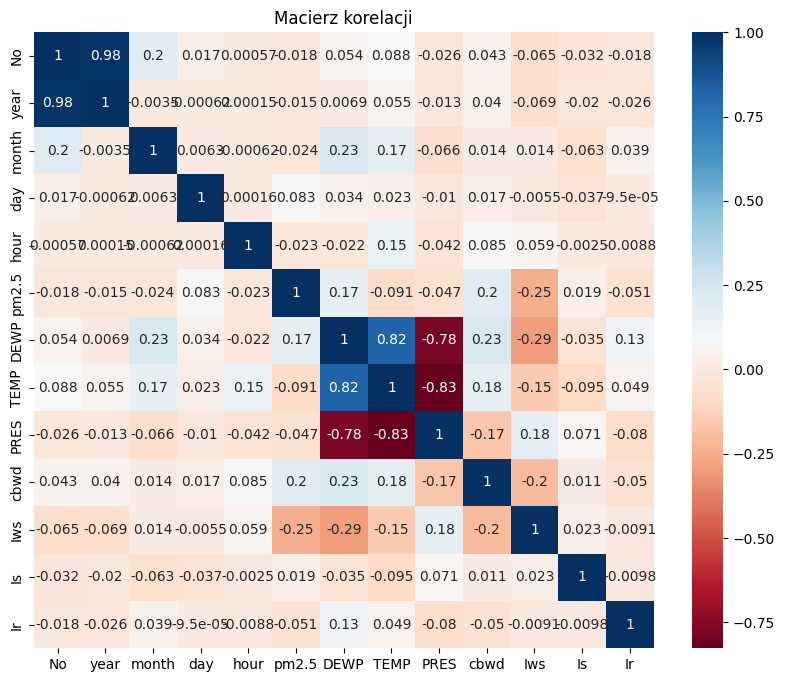

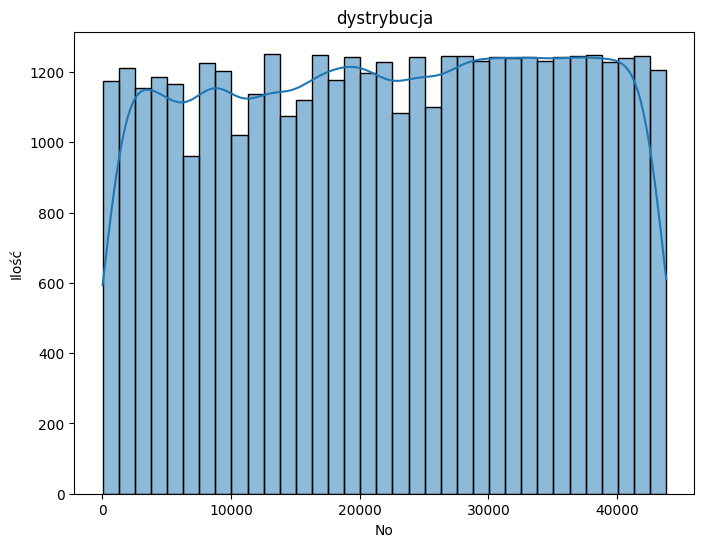

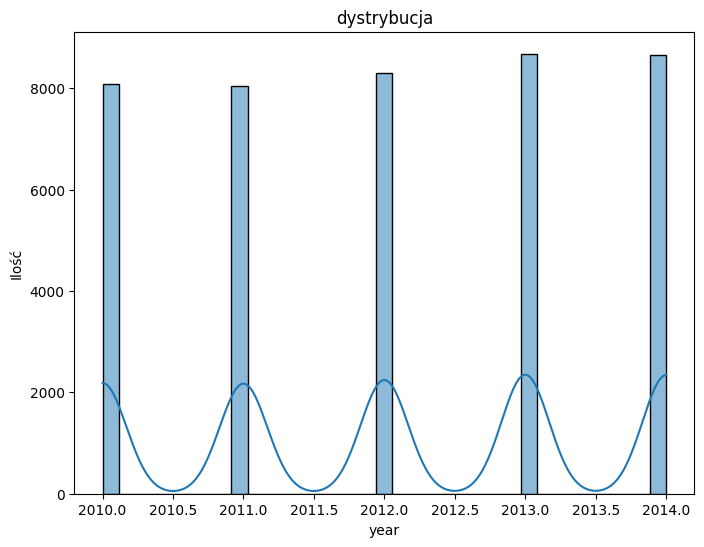

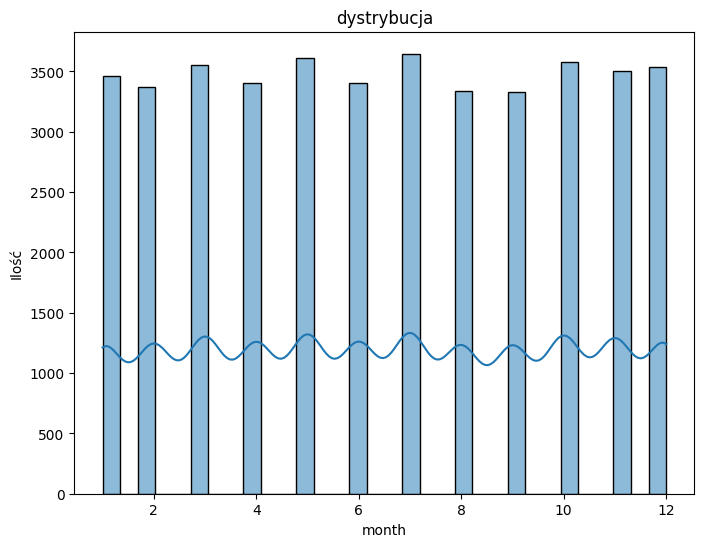

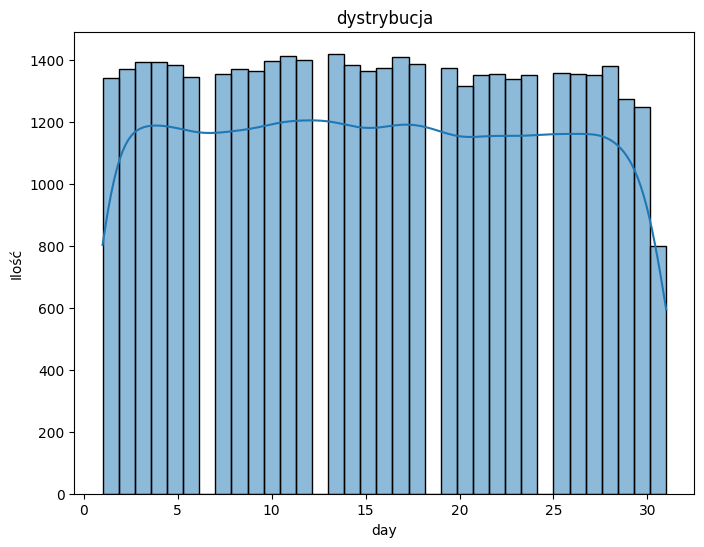

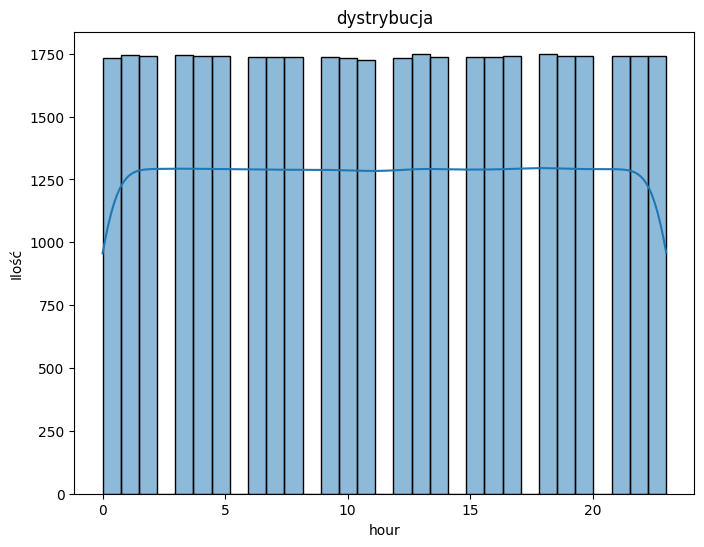

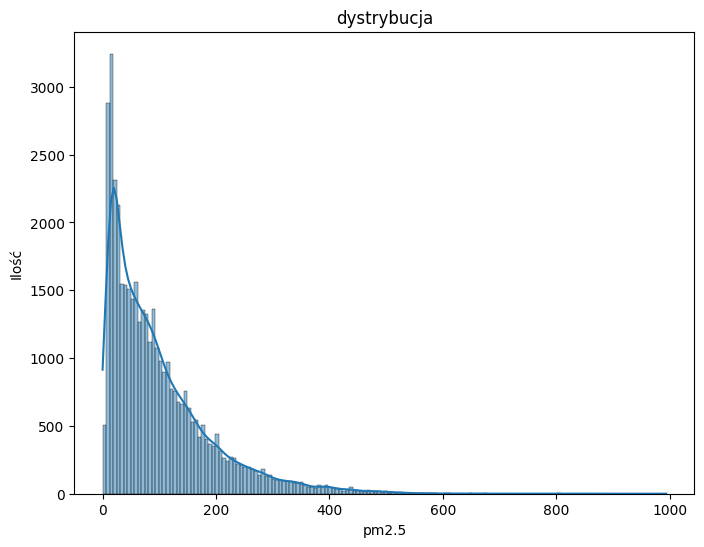

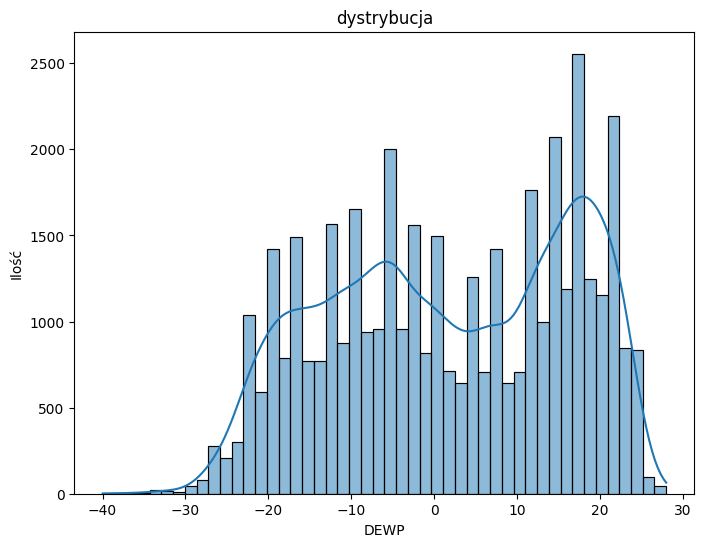

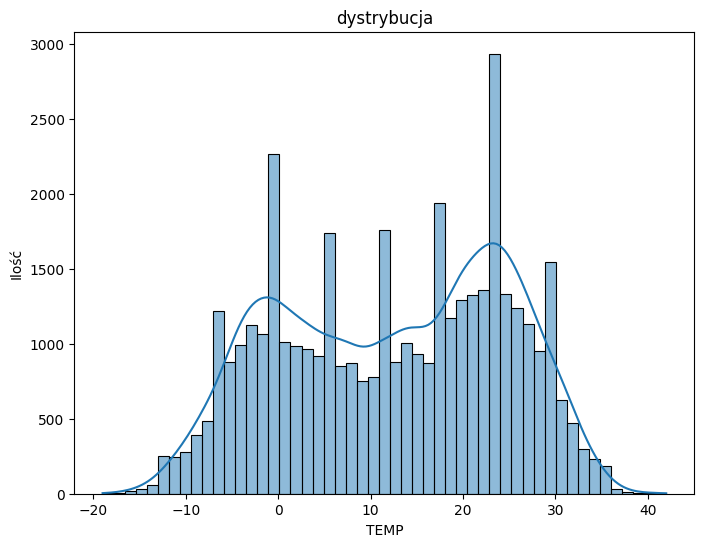

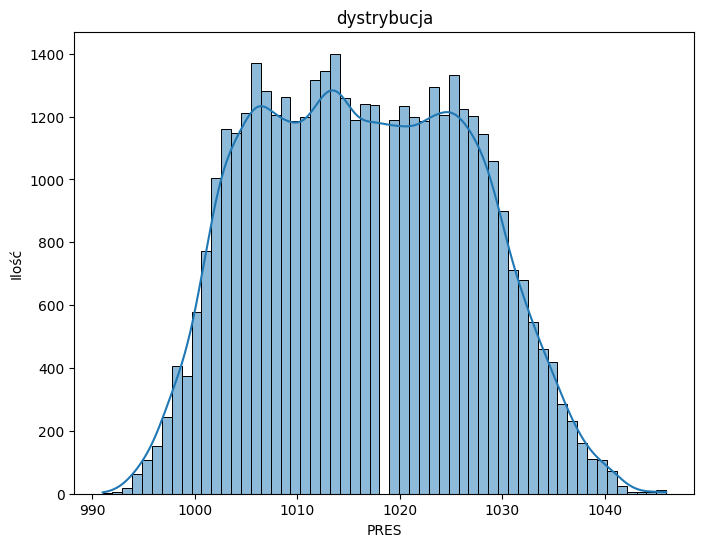

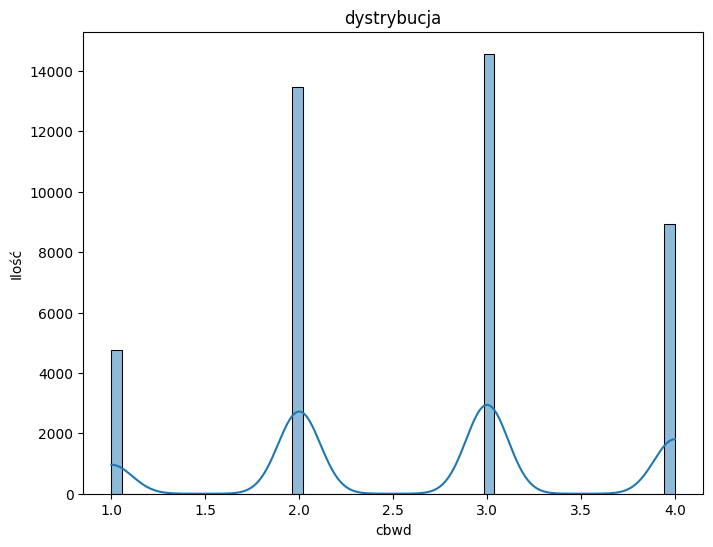

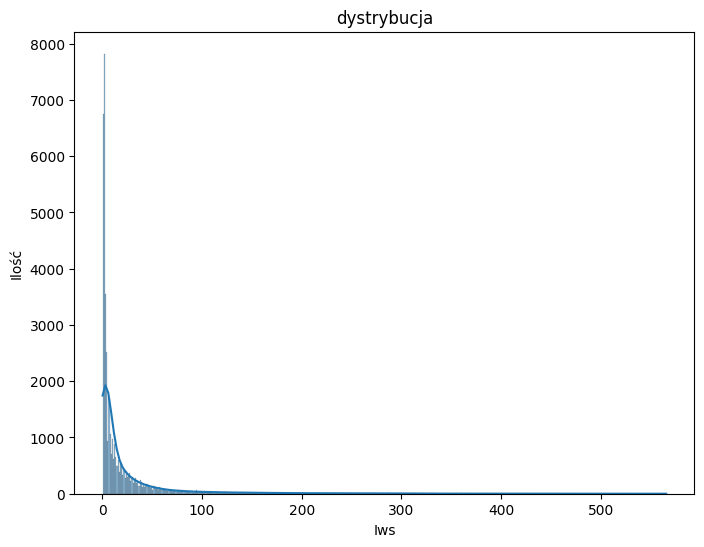

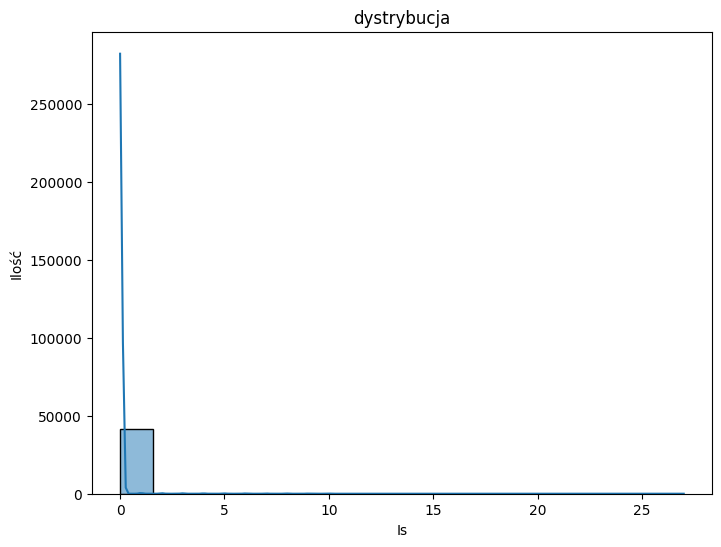

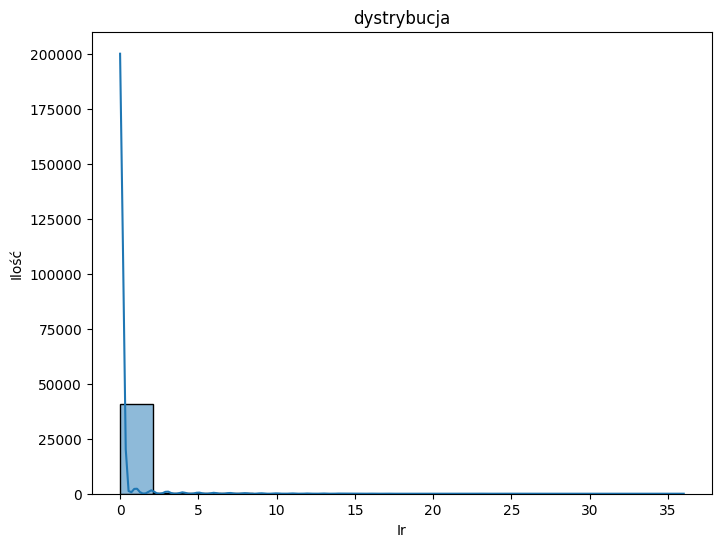

In [35]:
dataset= pd.read_csv('/content/sample_data/PRSA_data_2010.1.1-2014.12.csv');
#print(dataset.shape)
print(dataset.info())
dataset.head()
# na_count = dataset.isna().sum()
# print(na_count)
dataset=dataset.dropna();
# distinct_count = dataset['cbwd'].nunique()
# print(distinct_count)
# min_value = min(dataset['pm2.5'])
# print("min pm2.5:", min_value)

#featurtes_to_drop = [ "No","year","month","day","hour"]

# for column in featurtes_to_drop :
#   dataset=dataset.drop(column,axis=1)


wind_directions = ['NE', 'NW', 'SE', 'cv']

direction_mapping = {'NE': 1, 'NW': 2, 'SE': 3, 'cv': 4}

dataset['cbwd'] = dataset['cbwd'].map(direction_mapping)


correlation_matrix = dataset.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu')
plt.title('Macierz korelacji')
plt.show()

columns = dataset.columns.tolist()

for column in columns:
  plt.figure(figsize=(8, 6))
  sns.histplot(dataset[column], kde=True)
  plt.xlabel(column)
  plt.ylabel('Ilość')
  plt.title('dystrybucja')
  plt.show()
#dataset.to_csv('CLEANED_PRSA_data_2010.1.1-2014.12.csv', index=False)

X = dataset.drop("pm2.5", axis=1)
y = dataset["pm2.5"]

Cross-Validation  [-6295.09200528 -6391.76804119 -5927.05243601]
Average Score: -6204.63749415791
mse:  6105.506555900485
rmse:  78.13774091884463
mae:  56.88187503918191


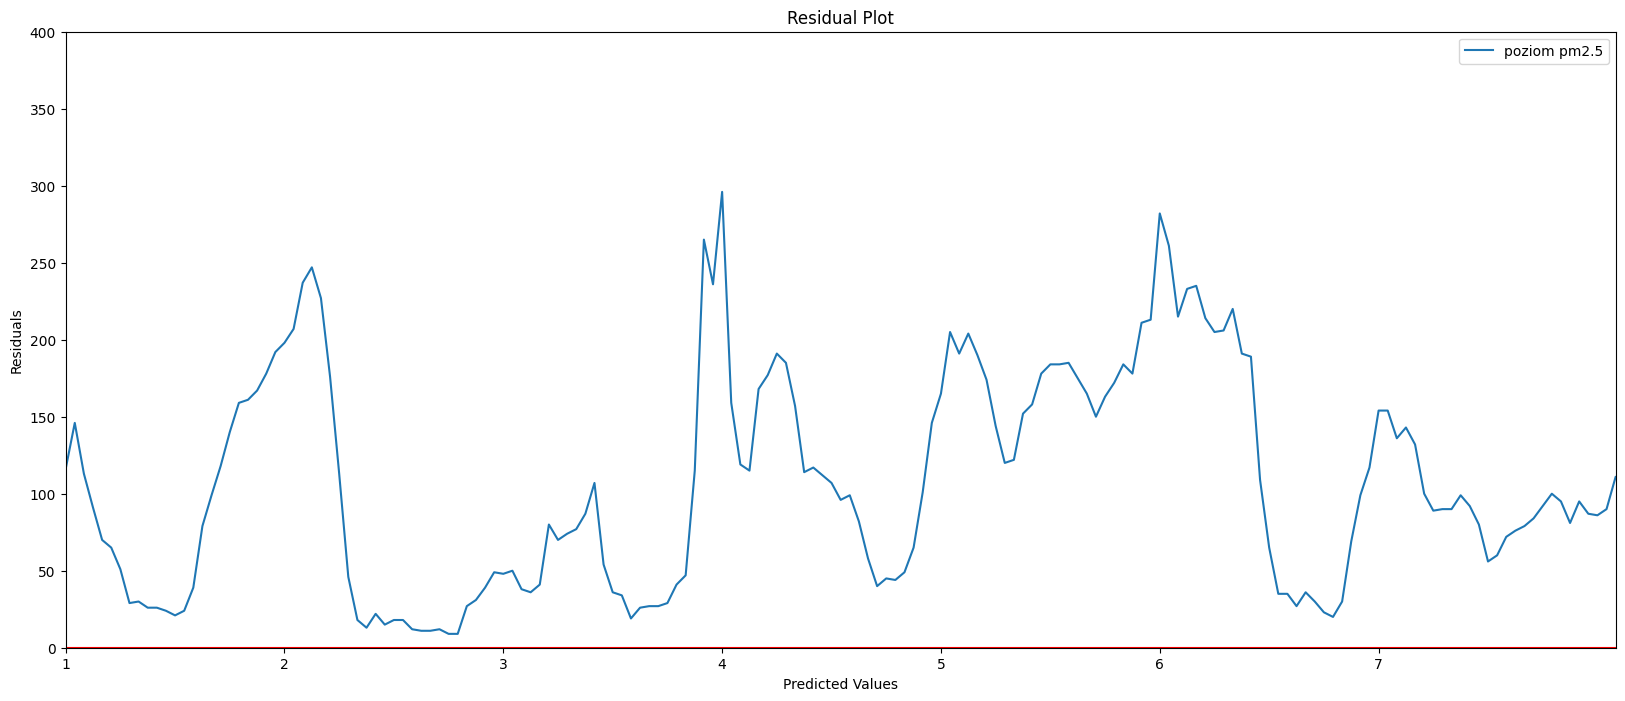

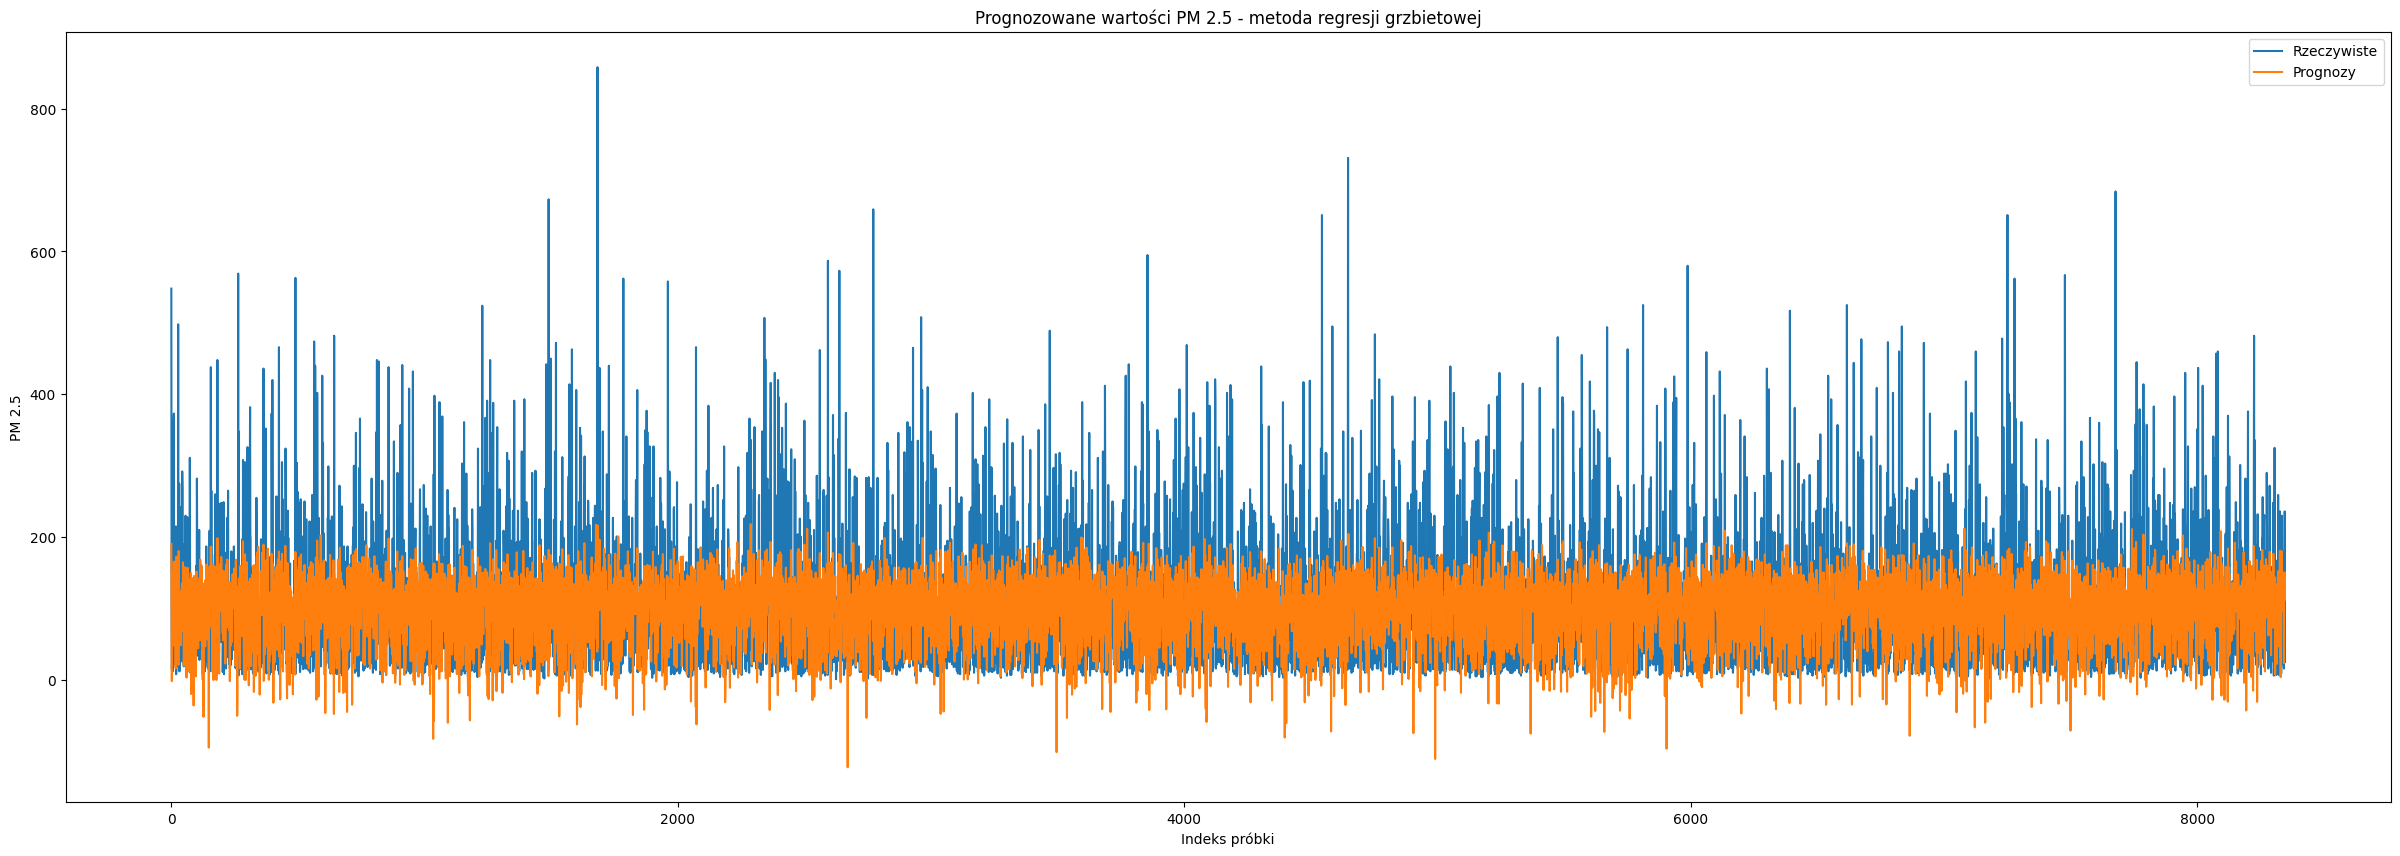

In [36]:

week = 7*24
# hourcheck = pd.DataFrame(dataset, columns=['pm2.5',"hour"])
# print(hourcheck[1002:1010])
plt.figure(figsize=(20, 8))
plt.plot(y.values, label='poziom pm2.5')
plt.xlim(1002, 1002 + week)
plt.ylim(0,400)
plt.xlabel('dzień tygodnia')
plt.ylabel('PM 2.5')
plt.title('Zróżnicowanie Zawartości zawartości pm2.5 w ciągu doby')
plt.legend()
tick_positions = range(1000, 1000 + week, 24)
tick_labels = [i // 24 + 1 -41 for i in tick_positions]
plt.xticks(tick_positions, tick_labels)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Random state kindly supplied by Douglas Adams

# splits = [X_train, X_test, y_train, y_test]
# splitnames=["X_train", "X_test", "y_train", "y_test"]
# i=0
# for split in splits:

#   name = splitnames[i]
#   print(name)
#   split.to_csv(f'{name}_PRSA_data_2010.1.1-2014.12.csv', index=False)
#   i = i+ 1

X_train = pd.read_csv('/content/sample_data/X_train_PRSA_data_2010.1.1-2014.12.csv');
X_test = pd.read_csv("/content/sample_data/X_test_PRSA_data_2010.1.1-2014.12.csv")
y_train = pd.read_csv("/content/sample_data/y_train_PRSA_data_2010.1.1-2014.12.csv")
y_test = pd.read_csv("/content/sample_data/y_test_PRSA_data_2010.1.1-2014.12.csv")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# scaler = MinMaxScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.fit_transform(X_train)

ridge = Ridge(alpha=0.2, fit_intercept=True, copy_X=True, max_iter=None, tol=0.0001, solver="svd", positive=False, random_state=42)

scores = cross_val_score(ridge, X_train, y_train, scoring='neg_mean_squared_error', cv=3)
average_score = scores.mean()

print("Cross-Validation ", scores)
print("Average Score:", average_score)

ridge.fit(X_train_scaled, y_train)

y_pred = ridge.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
print("mse: ", mse)
rmse = math.sqrt(mse)
print("rmse: ", rmse)
mae = mean_absolute_error(y_test, y_pred)
print("mae: ", mae)

# importance = ridge.coef_
# plt.bar(X.columns, importance)
# plt.title('Feature Importance')
# plt.xlabel('Features')
# plt.ylabel('Importance')
# plt.xticks(rotation='vertical')
# plt.show()

residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


plt.figure(figsize=(30, 10))
plt.plot(y_test.values, label='Rzeczywiste')
plt.plot(y_pred, label='Prognozy')
plt.xlabel('Indeks próbki')
plt.ylabel('PM 2.5')
plt.title('Prognozowane wartości PM 2.5 - metoda regresji grzbietowej')
plt.legend()
plt.show()